<a href="https://colab.research.google.com/github/schumbar/SJSU_CMPE255/blob/main/assignment_06/e_anomaly_detection_pyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE256: Assignment 06 - Part E
## Anomaly Detection Using pyOD

Hints:   

1. [Anomaly Detection in Time Series](https://neptune.ai/blog/anomaly-detection-in-time-series)

Dataset Source:

Generated via ChatGPT-4

Sources Used:
1. ChatGPT-4
2. All listed hints

### Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.2-py3-none-any.whl size=190289 sha256=756feb0ed506ce00181a4902899a0a9c736ed69f399be816ced0085767a90be3
  Stored in directory: /root/.cache/pip/wheels/81/1b/61/aa85b78c3c0c8871f4231e3f4a03bb23cecb7db829498380ee
Successfully built pyod


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN

### Generating Syntetic Data

In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset
n_samples = 1000
normal_mean = 0
normal_std = 1
anomaly_mean = 10
anomaly_std = 2

# Create a normal distribution for the majority of the data
normal_data = np.random.normal(normal_mean, normal_std, size=(n_samples // 2, 1))

# Create a distribution with anomalies
anomaly_data = np.random.normal(anomaly_mean, anomaly_std, size=(n_samples // 10, 1))

# Combine normal and anomaly data
data = np.vstack((normal_data, anomaly_data))

# Create a DataFrame
df = pd.DataFrame(data, columns=["Feature"])

# Save the dataset to a CSV file
df.to_csv("anomaly_dataset.csv", index=False)


### Loading Data

In [5]:
file_path = '/content/drive/MyDrive/Colab Notebooks/CMPE255/assignment_06/part_e/anomaly_dataset.csv'
dataset = pd.read_csv(file_path)

### Data Exploration

In [6]:
dataset.head()

,Feature
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153


In [7]:
rows = dataset.shape[0]
cols = dataset.shape[1]
print(f"rows: {rows}; columns: {cols}")

rows: 600; columns: 1


In [8]:
dataset.describe()

,Feature
count,600.000000
mean,1.633930
std,3.824293
min,-3.241267
25%,-0.546699
50%,0.244327
75%,1.284627
max,14.541386


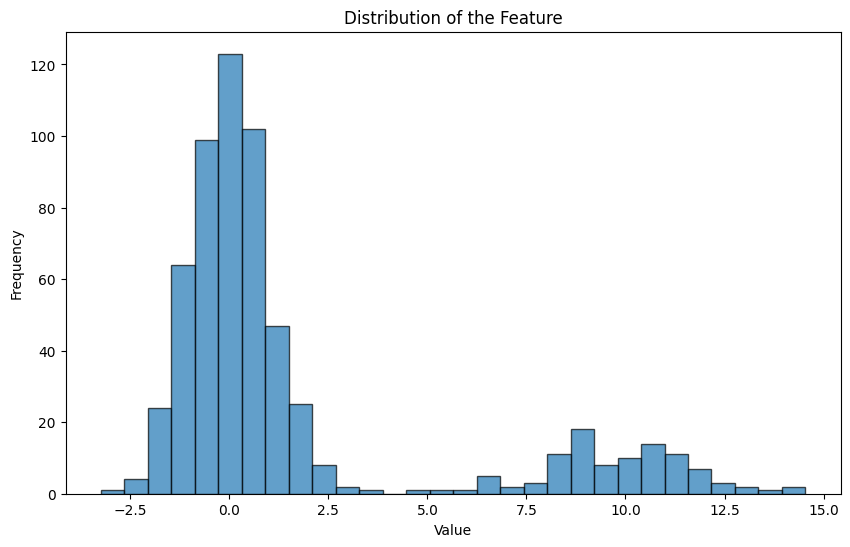

In [9]:
# Data Exploration

# Plotting the feature to understand its distribution
plt.figure(figsize=(10, 6))
plt.hist(dataset['Feature'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of the Feature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### Anomaly Detection with pyOD

In [10]:

model = KNN()

# Train the model
model.fit(dataset[['Feature']])

# Get the prediction labels and outlier scores
dataset['Labels'] = model.labels_
dataset['Scores'] = model.decision_scores_


### Results and Analysis

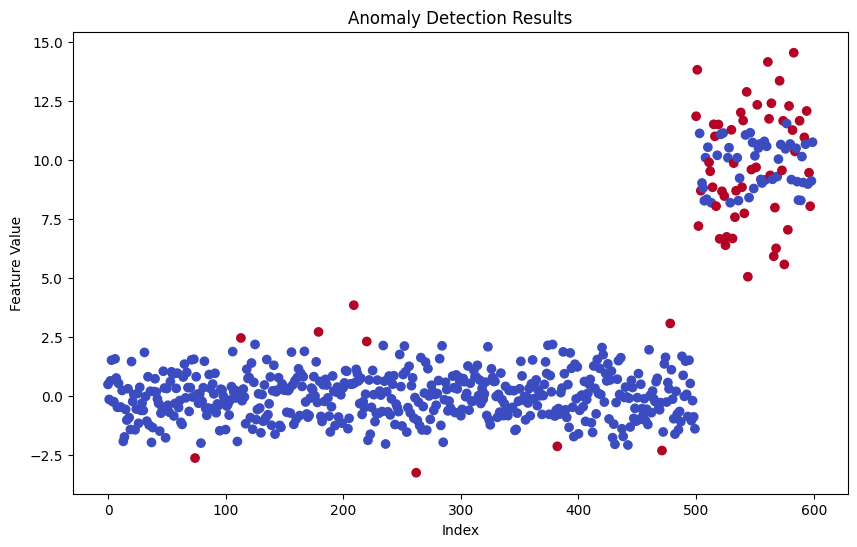

In [11]:
# Visualizing the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(dataset.index, dataset['Feature'], c=model.labels_, cmap='coolwarm')
plt.title('Anomaly Detection Results')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.show()


### Conclusion
In this assignment, we demonstrated univariate anomaly detection using the pyOD library.
The results indicate the presence of anomalies in the dataset, as visualized in the scatter plot.
Further analysis can be conducted to refine the model or to understand the nature of these anomalies.